In [1]:
import numpy as np
import geopandas as gpd

import osmnx as ox
import networkx as nx

import os
os.environ['USE_PYGEOS'] = '0'
from shapely.geometry import Point, LineString, Polygon, MultiPolygon, MultiLineString
from descartes import PolygonPatch

import matplotlib.pyplot as plt
import folium


C:\Users\Dalton\.gds\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\Dalton\AppData\Local\Temp\ipykernel_17268\3366590829.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/lat

In [2]:
# Specify type of data
tags = {'building': True}

# Download building geometries from OSM
gdf = ox.geometries_from_place('Eugene, Oregon, USA', tags)

In [3]:
print(gdf.shape)

(57992, 280)


In [4]:
# Filter cafes
cafes = gdf[gdf['amenity'] == 'cafe'].reset_index()
print(cafes.shape)

(31, 282)


In [5]:
# Get cafe centroids
cafes['centroid'] = cafes['geometry'].apply(
  lambda x: x.centroid if type(x) == Polygon else (
  x.centroid if type(x) == MultiPolygon else x))

In [6]:
# Define center of map (i.e. Condon Hall) and initial zoom level
lat_lon = [44.0751, -123.0781]
m = folium.Map(location=lat_lon, zoom_start=12)

for i in range(0, cafes.shape[0]):
    my_string = cafes.iloc[i]['name']
    folium.Marker([cafes.iloc[i]['centroid'].y, cafes.iloc[i]['centroid'].x],
                 popup=my_string).add_to(m)

# Display map
m

In [7]:
# Define coordinates of Condon Hall
lat_lon = (44.0451, -123.0781)

# Define walkable street network 3.2 km around Condon Hall
g = ox.graph_from_point(lat_lon, dist=3200, network_type='walk')

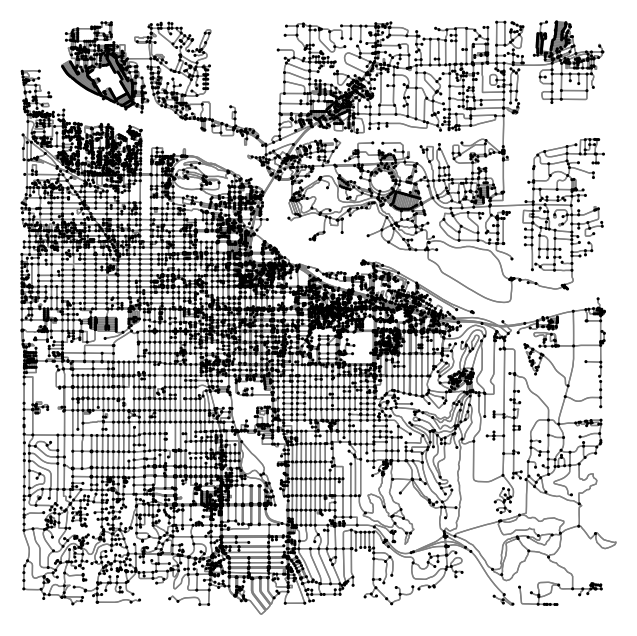

In [8]:
# Plot map
fig, ax = ox.plot_graph(g, bgcolor='white', node_color='black', edge_color='grey', node_size=5)

In [9]:
type(g)

networkx.classes.multidigraph.MultiDiGraph

In [10]:
# Convert to graph
graph_proj = ox.project_graph(g, to_crs=None)

In [11]:
# Get coordinates of Condon Hall
condon_hall = gdf[gdf['name'] == 'Condon Hall'].reset_index()

# Reproject to UTM Zone 10N
condon_hall = condon_hall.to_crs('EPSG:32610')
cafes = cafes.to_crs('EPSG:32610')

In [12]:
condon_hall['centroid'] = condon_hall['geometry'].apply(
  lambda x: x.centroid if type(x) == Polygon else (
  x.centroid if type(x) == MultiPolygon else x))

cafes['centroid'] = cafes['geometry'].apply(
  lambda x: x.centroid if type(x) == Polygon else (
  x.centroid if type(x) == MultiPolygon else x))

In [13]:
# Get x and y coordinates of Condon Hall
orig_xy = [condon_hall['centroid'].y.values[0], condon_hall['centroid'].x.values[0]]

# Get x and y coordinates of the first cafe
target_xy = [cafes['centroid'].y.values[0], cafes['centroid'].x.values[0]]

In [14]:
# Find the node in the graph that is closest to the origin point
orig_node = ox.distance.nearest_nodes(graph_proj, X=orig_xy[1], Y=orig_xy[0], return_dist=False)

# Find the node in the graph that is closest to the target point
target_node = ox.distance.nearest_nodes(graph_proj, X=target_xy[1], Y=target_xy[0], return_dist=False)

In [15]:
# Calculate the shortest path
route = nx.shortest_path(G=graph_proj, source=orig_node, target=target_node, weight='length')
length = nx.shortest_path_length(G=graph_proj, source=orig_node, target=target_node, weight='length')

IndexError: tuple index out of range

In [ ]:
print(nx.__version__)